# PROJECT TASK: [ Score: 100 points]

## Milestone 1: [ Score: 40 points ]

**Import and merge all the three datasets**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Convert the .txt files to .csv files

# Define the file paths and corresponding headers
file_paths = [
    ("/content/drive/MyDrive/commoncrawl.de-en.en", "/content/drive/MyDrive/commoncrawl.en.csv", "english"),
    ("/content/drive/MyDrive/commoncrawl.de-en.de", "/content/drive/MyDrive/commoncrawl.de.csv", "german"),
    ("/content/drive/MyDrive/europarl-v7.de-en.en", "/content/drive/MyDrive/europal.en.csv", "english"),
    ("/content/drive/MyDrive/europarl-v7.de-en.de", "/content/drive/MyDrive/europal.de.csv", "german"),
    ("/content/drive/MyDrive/news-commentary-v9.de-en.en", "/content/drive/MyDrive/news-commentary.en.csv", "english"),
    ("/content/drive/MyDrive/news-commentary-v9.de-en.de", "/content/drive/MyDrive/news-commentary.de.csv", "german")
]

# Convert each file to CSV with specified headers
for file_path, csv_path, header in file_paths:
    with open(file_path, 'r') as file:
        data = file.read().splitlines()

    df = pd.DataFrame(data, columns=[header])
    df.to_csv(csv_path, index=False)

print("Conversion complete.")

Conversion complete.


In [18]:
import pandas as pd
#df_1 = pd.read_csv("/content/drive/MyDrive/commoncrawl.en.csv") # english commoncrawl dataset has lot of noise in it
#df_2 = pd.read_csv("/content/drive/MyDrive/commoncrawl.de.csv") # german commoncrawl dataset has lot of noise in it
df_3 = pd.read_csv("/content/drive/MyDrive/europal.en.csv")
df_4 = pd.read_csv("/content/drive/MyDrive/europal.de.csv")
df_5 = pd.read_csv("/content/drive/MyDrive/news-commentary.en.csv")
df_6 = pd.read_csv("/content/drive/MyDrive/news-commentary.de.csv")

In [19]:
# Display the shape of each DataFrame
print("Shape of europal.en.csv:", df_3.shape)
print("Shape of europal.de.csv:", df_4.shape)
print("Shape of news-commentary.en.csv:", df_5.shape)
print("Shape of news-commentary.de.csv:", df_6.shape)

Shape of europal.en.csv: (1920209, 1)
Shape of europal.de.csv: (1920209, 1)
Shape of news-commentary.en.csv: (201993, 1)
Shape of news-commentary.de.csv: (201844, 1)


In [20]:
# Select the first 10000 samples from each dataframe
#df_1 = df_1.head(10000) # upto 10k
#df_2 = df_2.head(10000) # upto 10k
df_3 = df_3.head(10000) # upto 10k
df_4 = df_4.head(10000) # upto 10k
df_5 = df_5.head(10000) # upto 10k
df_6 = df_6.head(10000) # upto 10k

In [21]:
# Merging based on English and German columns
merged_df = pd.DataFrame({
    'english': pd.concat([df_3['english'], df_5['english']], ignore_index=True),
    'german': pd.concat([df_4['german'], df_6['german']], ignore_index=True)
})

# Display the merged dataframe
merged_df

,english,german
0,Resumption of the session,Wiederaufnahme der Sitzungsperiode
1,I declare resumed the session of the European ...,"Ich erkläre die am Freitag, dem 17. Dezember u..."
2,"Although, as you will have seen, the dreaded '...","Wie Sie feststellen konnten, ist der gefürchte..."
3,You have requested a debate on this subject in...,Im Parlament besteht der Wunsch nach einer Aus...
4,"In the meantime, I should like to observe a mi...",Heute möchte ich Sie bitten - das ist auch der...
...,...,...
19995,"Second, adequate resources should be made avai...","Zweitens, armen und gefährdeten Regionen und L..."
19996,"Climate change, which was largely brought abou...",Der größtenteils durch die Aktivitäten der Ind...
19997,It has created a more hostile environment for ...,Er hat ein entwicklungsfeindlicheres Umfeld ge...
19998,No amount of money will undo the damage done.,"Kein Geldbetrag wird ausreichen, um den zugefü..."


In [22]:
# Shape of the dataset
merged_df.shape

(20000, 2)

In [23]:
# Save the merged dataframe to a CSV file
merged_df.to_csv('/content/drive/MyDrive/merged_data.csv', index=False)

**Data cleansing**

In [24]:
import pandas as pd

# Load the merged dataset
merged_df = pd.read_csv('/content/drive/MyDrive/merged_data.csv')

In [25]:
# Check for duplicates
print("Number of duplicates:\n",merged_df.duplicated().sum())

# Remove duplicates
merged_df.drop_duplicates(inplace=True)

Number of duplicates:
 143


In [26]:
# Check for missing values
print("Number of missing values:")
print(merged_df.isna().sum())

# Remove rows with missing values
merged_df.dropna(inplace=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Display the number of sentences after cleaning
print(f"Total number of sentences after cleaning: {len(merged_df)}")

Number of missing values:
english    24
german     22
dtype: int64
Total number of sentences after cleaning: 19811


In [27]:
merged_df

,english,german
0,Resumption of the session,Wiederaufnahme der Sitzungsperiode
1,I declare resumed the session of the European ...,"Ich erkläre die am Freitag, dem 17. Dezember u..."
2,"Although, as you will have seen, the dreaded '...","Wie Sie feststellen konnten, ist der gefürchte..."
3,You have requested a debate on this subject in...,Im Parlament besteht der Wunsch nach einer Aus...
4,"In the meantime, I should like to observe a mi...",Heute möchte ich Sie bitten - das ist auch der...
...,...,...
19806,"Second, adequate resources should be made avai...","Zweitens, armen und gefährdeten Regionen und L..."
19807,"Climate change, which was largely brought abou...",Der größtenteils durch die Aktivitäten der Ind...
19808,It has created a more hostile environment for ...,Er hat ein entwicklungsfeindlicheres Umfeld ge...
19809,No amount of money will undo the damage done.,"Kein Geldbetrag wird ausreichen, um den zugefü..."


In [28]:
import pandas as pd

# Take a random sample of 10,000 records
merged_df_sample = merged_df.sample(n=10000, random_state=42)

# Display the shape to verify
print("Shape of sampled DataFrame:", merged_df_sample.shape)

# Reset the index
merged_df_sample.reset_index(drop=True, inplace=True)

# Copy the dataframe
merged_df = merged_df_sample.copy()
# Display the sampled DataFrame
merged_df

Shape of sampled DataFrame: (10000, 2)


,english,german
0,That is why he deserves special mention!,Deshalb möchte ich das hier besonders erwähnen!
1,"Lastly, will we be able to recognise when this...","Die letzte Frage: Werden wir erkennen können, ..."
2,A second reason to fear a double-dip recession...,Ein zweiter Grund für die Furcht vor einem Rüc...
3,"President of the Commission, a short while ago...","Herr Kommissionspräsident, Sie sagten vorhin, ..."
4,Question No 28 by (H-0781/99):,Anfrage Nr. 28 von (H-0781/99):
...,...,...
9995,"I signed a letter yesterday afternoon, in the ...",Gestern nachmittag habe ich während der Beratu...
9996,While sovereign credit quality has deteriorate...,Während sich die Bonität der Staaten praktisch...
9997,I was myself a car worker before I was elected...,Ich selbst war vor meiner Wahl Automobilarbeit...
9998,This week we will be holding a debate here on ...,In dieser Woche werden wir hier aufgrund der K...


In [29]:
# Truncate English sentences to 10 words
merged_df['english'] = merged_df['english'].apply(lambda x: ' '.join(x.split()[:10]))

# Truncate German sentences to 15 words
merged_df['german'] = merged_df['german'].apply(lambda x: ' '.join(x.split()[:15]))

# Display the truncated dataframe
print(merged_df.head())

                                             english  \
0           That is why he deserves special mention!   
1  Lastly, will we be able to recognise when this...   
2  A second reason to fear a double-dip recession...   
3  President of the Commission, a short while ago...   
4                     Question No 28 by (H-0781/99):   

                                              german  
0    Deshalb möchte ich das hier besonders erwähnen!  
1  Die letzte Frage: Werden wir erkennen können, ...  
2  Ein zweiter Grund für die Furcht vor einem Rüc...  
3  Herr Kommissionspräsident, Sie sagten vorhin, ...  
4                    Anfrage Nr. 28 von (H-0781/99):  


In [30]:
merged_df.to_csv('/content/drive/MyDrive/cleaned_data.csv', index=False)

**NLP pre processing - Dataset suitable to be used for AIML model learning**

In [31]:
# NLP preprocessing with lemmatization without stop words removal
# Import the necessary libraries
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [32]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load the cleaned dataset
cleaned_df = pd.read_csv('/content/drive/MyDrive/cleaned_data.csv')

# Convert text to lowercase
cleaned_df['english'] = cleaned_df['english'].str.lower()
cleaned_df['german'] = cleaned_df['german'].str.lower()

# Initialize tokenizers
eng_tokenizer = Tokenizer()
ger_tokenizer = Tokenizer()

# Initialize lemmatizer for English
eng_lemmatizer = WordNetLemmatizer()

# Function for tokenizing, lemmatizing, and retaining stopwords for English
def preprocess_text_lemmatized_eng(text):
    tokens = nltk.word_tokenize(text.lower())
    lemmatized_tokens = [eng_lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return " ".join(lemmatized_tokens)

# Initialize lemmatizer for German
ger_lemmatizer = WordNetLemmatizer()

# Function for tokenizing, lemmatizing, and retaining stopwords for German
def preprocess_text_lemmatized_ger(text):
    tokens = nltk.word_tokenize(text.lower())
    lemmatized_tokens = [ger_lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return " ".join(lemmatized_tokens)

# Apply lemmatization preprocessing to English and German sentences
cleaned_df['english_lemmatized'] = cleaned_df['english'].apply(preprocess_text_lemmatized_eng)
cleaned_df['german_lemmatized'] = cleaned_df['german'].apply(preprocess_text_lemmatized_ger)

# Fit the tokenizers on the preprocessed text data
eng_tokenizer.fit_on_texts(cleaned_df['english_lemmatized'])
ger_tokenizer.fit_on_texts(cleaned_df['german_lemmatized'])

# Convert text to sequences of integers
eng_sequences_lemmatized = eng_tokenizer.texts_to_sequences(cleaned_df['english_lemmatized'])
ger_sequences_lemmatized = ger_tokenizer.texts_to_sequences(cleaned_df['german_lemmatized'])

# Pad the sequences to ensure uniform length
max_eng_length_lemmatized = max([len(seq) for seq in eng_sequences_lemmatized])
max_ger_length_lemmatized = max([len(seq) for seq in ger_sequences_lemmatized])

eng_padded_lemmatized = pad_sequences(eng_sequences_lemmatized, maxlen=max_eng_length_lemmatized, padding='post')
ger_padded_lemmatized = pad_sequences(ger_sequences_lemmatized, maxlen=max_ger_length_lemmatized, padding='post')

# Display the shape of the padded sequences for lemmatized data
print(f"Lemmatized English sequences shape: {eng_padded_lemmatized.shape}")
print(f"Lemmatized German sequences shape: {ger_padded_lemmatized.shape}")

# Save tokenizers and preprocessed data for model training
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'wb') as f:
    pickle.dump(eng_tokenizer, f)

with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'wb') as f:
    pickle.dump(ger_tokenizer, f)

# Save the padded sequences to CSV files for lemmatized data
pd.DataFrame(eng_padded_lemmatized).to_csv('/content/drive/MyDrive/eng_padded_lemmatized.csv', index=False)
pd.DataFrame(ger_padded_lemmatized).to_csv('/content/drive/MyDrive/ger_padded_lemmatized.csv', index=False)

print("Lemmatized NLP preprocessing completed and data saved.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Lemmatized English sequences shape: (10000, 12)
Lemmatized German sequences shape: (10000, 17)
Lemmatized NLP preprocessing completed and data saved.


In [33]:
# NLP preprocessing with lemmatization

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load tokenized and padded data for English (input) and German (output)
eng_padded = pd.read_csv('/content/drive/MyDrive/eng_padded_lemmatized.csv').values
ger_padded = pd.read_csv('/content/drive/MyDrive/ger_padded_lemmatized.csv').values

# Ensure the sequence lengths are consistent
max_sequence_length = max(eng_padded.shape[1], ger_padded.shape[1])

# Pad sequences to ensure uniform length
eng_padded = tf.keras.preprocessing.sequence.pad_sequences(eng_padded, maxlen=max_sequence_length, padding='post')
ger_padded = tf.keras.preprocessing.sequence.pad_sequences(ger_padded, maxlen=max_sequence_length, padding='post')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(eng_padded, ger_padded, test_size=0.2, random_state=42)

print("Data loaded, padded, and split into training and test sets.")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Max sequence length: {max_sequence_length}")

Data loaded, padded, and split into training and test sets.
Training set size: 8000
Test set size: 2000
Max sequence length: 17


**Design, train and test simple RNN & LSTM model**

**Simple RNN**

In [ ]:
# Define the RNN model
def build_rnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=input_shape[0], output_dim=256, input_length=input_shape[1]),
        tf.keras.layers.SimpleRNN(256, return_sequences=True),
        tf.keras.layers.Dense(input_shape[0], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define input and output shapes
vocab_size = max(eng_padded.max(), ger_padded.max()) + 1  # Adding 1 because max token value is equal to vocab size - 1
input_shape = (vocab_size, max_sequence_length)

# Build and compile the RNN model
rnn_model = build_rnn_model(input_shape)

# Reshape y_train and y_test for sparse_categorical_crossentropy
y_train_reshaped = np.expand_dims(y_train, -1)
y_test_reshaped = np.expand_dims(y_test, -1)

# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train_reshaped, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test_reshaped)
print(f"RNN Model - Loss: {rnn_loss}, Accuracy: {rnn_accuracy}")

Epoch 1/50
100/100 [==============================] - 11s 87ms/step - loss: 6.8854 - accuracy: 0.2211 - val_loss: 6.3815 - val_accuracy: 0.2298
Epoch 2/50
100/100 [==============================] - 5s 49ms/step - loss: 6.1894 - accuracy: 0.2236 - val_loss: 6.0599 - val_accuracy: 0.2302
Epoch 3/50
100/100 [==============================] - 5s 46ms/step - loss: 5.8361 - accuracy: 0.2361 - val_loss: 5.9723 - val_accuracy: 0.2484
Epoch 4/50
100/100 [==============================] - 5s 47ms/step - loss: 5.6945 - accuracy: 0.2464 - val_loss: 5.9542 - val_accuracy: 0.2515
Epoch 5/50
100/100 [==============================] - 4s 42ms/step - loss: 5.5904 - accuracy: 0.2483 - val_loss: 5.9662 - val_accuracy: 0.2546
Epoch 6/50
100/100 [==============================] - 4s 44ms/step - loss: 5.4990 - accuracy: 0.2530 - val_loss: 5.9800 - val_accuracy: 0.2565
Epoch 7/50
100/100 [==============================] - 5s 49ms/step - loss: 5.4028 - accuracy: 0.2555 - val_loss: 5.9963 - val_accuracy: 0.257

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Sample sentences for testing
sample_sentences = [
    "It cannot be copied arbitrarily since each Member State has",
    "how are you?",
    "I would like to end on the following point.",
    "I would also like to recognise the reasonable and flexible",
    "How are you today?",
    "This is a test sentence.",
    "What is your name?"
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the trained model
predictions = rnn_model.predict(sample_padded)

# Convert predictions back to text (German sentences)
# Assuming ger_tokenizer is loaded similarly as eng_tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

predicted_sentences = []
for prediction in predictions:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences.append(decoded_sentence)

# Display the original and translated sentences
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences[i]}\n")

1/1 [==============================] - 0s 173ms/step
Input: It cannot be copied arbitrarily since each Member State has
Translated: e werden nuklearwaffen feind die jeder der und in der

Input: how are you?
Translated: wie sind sie

Input: I would like to end on the following point.
Translated: ich möchte ich grossetête den in der sich diese

Input: I would also like to recognise the reasonable and flexible
Translated: ich möchte ich einige sagen und flexible haltung die rate loben

Input: How are you today?
Translated: wie sind sie die

Input: This is a test sentence.
Translated: da ist eine den

Input: What is your name?
Translated: wa ist eine die die der



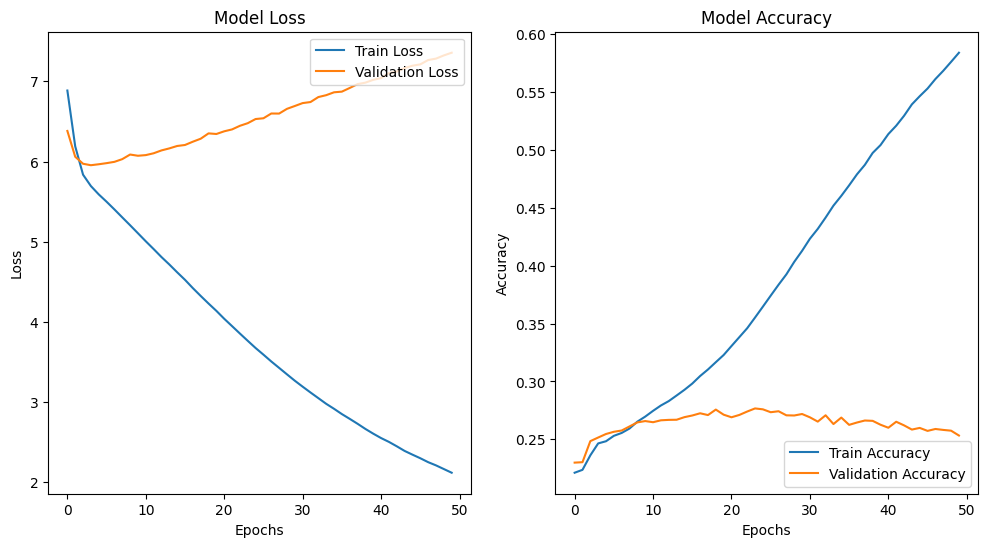

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Simple LSTM**

In [ ]:
# Define the LSTM model
def build_lstm_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=input_shape[0], output_dim=256, input_length=input_shape[1]),
        tf.keras.layers.LSTM(256, return_sequences=True),
        tf.keras.layers.Dense(input_shape[0], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and compile the LSTM model
lstm_model = build_lstm_model(input_shape)

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train_reshaped, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test_reshaped)
print(f"LSTM Model - Loss: {lstm_loss}, Accuracy: {lstm_accuracy}")

Epoch 1/50
100/100 [==============================] - 10s 84ms/step - loss: 7.0985 - accuracy: 0.2221 - val_loss: 6.4343 - val_accuracy: 0.2297
Epoch 2/50
100/100 [==============================] - 4s 40ms/step - loss: 6.1041 - accuracy: 0.2239 - val_loss: 6.0847 - val_accuracy: 0.2304
Epoch 3/50
100/100 [==============================] - 4s 43ms/step - loss: 5.8147 - accuracy: 0.2346 - val_loss: 5.9924 - val_accuracy: 0.2483
Epoch 4/50
100/100 [==============================] - 4s 39ms/step - loss: 5.7240 - accuracy: 0.2441 - val_loss: 5.9947 - val_accuracy: 0.2501
Epoch 5/50
100/100 [==============================] - 4s 41ms/step - loss: 5.6637 - accuracy: 0.2461 - val_loss: 6.0011 - val_accuracy: 0.2492
Epoch 6/50
100/100 [==============================] - 4s 40ms/step - loss: 5.6069 - accuracy: 0.2485 - val_loss: 6.0126 - val_accuracy: 0.2506
Epoch 7/50
100/100 [==============================] - 4s 39ms/step - loss: 5.5600 - accuracy: 0.2508 - val_loss: 6.0177 - val_accuracy: 0.249

In [ ]:
# Sample sentences for testing
sample_sentences = [
    "HI I AM",
    "I love machine learning.",
    "This is a test sentence.",
    "What is your name?",
    "What time is the meeting tomorrow?",
    "It cannot be copied arbitrarily since each Member State has",
    "how are you?",
    "How are you today?",
    "This is a test sentence.",
    "What is your name?"
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the trained LSTM model
predictions = lstm_model.predict(sample_padded)

# Load the German tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Convert predictions back to text (German sentences)
predicted_sentences = []
for prediction in predictions:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences.append(decoded_sentence)

# Display the original and translated sentences
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences[i]}\n")

1/1 [==============================] - 1s 679ms/step
Input: HI I AM
Translated: ich bin

Input: I love machine learning.
Translated: ich nachmittag

Input: This is a test sentence.
Translated: da ist eine daß

Input: What is your name?
Translated: wa ist sie die muster

Input: What time is the meeting tomorrow?
Translated: wa ist ist die die das

Input: It cannot be copied arbitrarily since each Member State has
Translated: e ist konzept misshandlung die fachleuten mitgliedstaat von zu eigenen zu

Input: how are you?
Translated: wie gibt sie

Input: How are you today?
Translated: wie gibt sie frau

Input: This is a test sentence.
Translated: da ist eine daß

Input: What is your name?
Translated: wa ist sie die muster



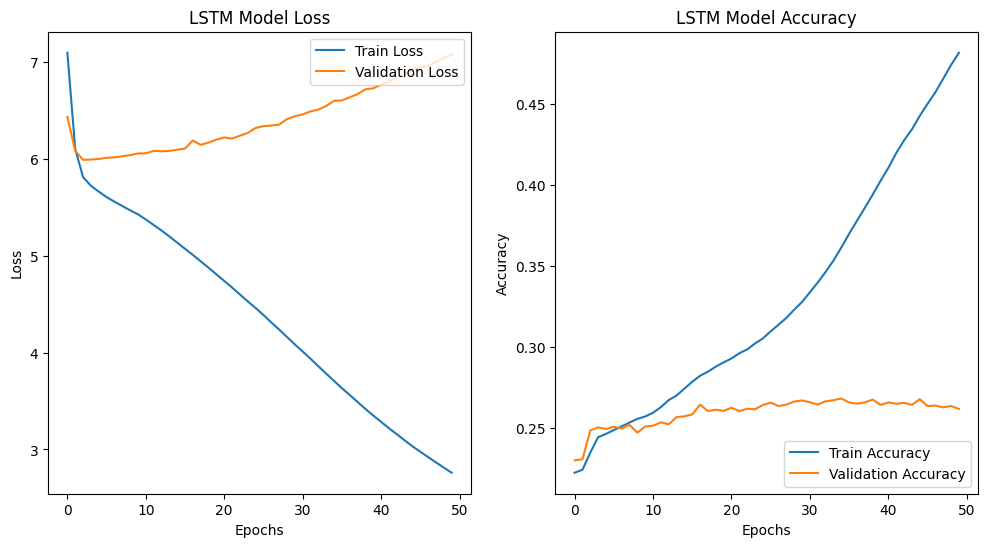

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## Milestone 2

**Design, train and test RNN & LSTM model with embeddings**

**RNN with Embeddings**

In [ ]:
# Define the RNN model with embedding
def build__rnn_embedding_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=input_shape[0], output_dim=128, input_length=input_shape[1]),
        tf.keras.layers.SimpleRNN(128, return_sequences=True),
        tf.keras.layers.Dense(64, activation='relu'), # add additional layer
        tf.keras.layers.Dense(input_shape[0], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and compile the modified RNN model with embedding
modified_rnn_model = build__rnn_embedding_model(input_shape)

# Train the modified RNN model with embedding
modified_rnn_history = modified_rnn_model.fit(X_train, y_train_reshaped, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the modified RNN model with embedding
modified_rnn_loss, modified_rnn_accuracy = modified_rnn_model.evaluate(X_test, y_test_reshaped)
print(f"Modified RNN Model with Embedding - Loss: {modified_rnn_loss}, Accuracy: {modified_rnn_accuracy}")

Epoch 1/50
100/100 [==============================] - 10s 82ms/step - loss: 7.0625 - accuracy: 0.1617 - val_loss: 6.2631 - val_accuracy: 0.2301
Epoch 2/50
100/100 [==============================] - 5s 48ms/step - loss: 6.0578 - accuracy: 0.2236 - val_loss: 6.0824 - val_accuracy: 0.2301
Epoch 3/50
100/100 [==============================] - 4s 40ms/step - loss: 5.8126 - accuracy: 0.2254 - val_loss: 5.9431 - val_accuracy: 0.2467
Epoch 4/50
100/100 [==============================] - 4s 45ms/step - loss: 5.6704 - accuracy: 0.2450 - val_loss: 5.9063 - val_accuracy: 0.2512
Epoch 5/50
100/100 [==============================] - 4s 40ms/step - loss: 5.5844 - accuracy: 0.2493 - val_loss: 5.9186 - val_accuracy: 0.2541
Epoch 6/50
100/100 [==============================] - 4s 37ms/step - loss: 5.5180 - accuracy: 0.2508 - val_loss: 5.9334 - val_accuracy: 0.2550
Epoch 7/50
100/100 [==============================] - 5s 49ms/step - loss: 5.4638 - accuracy: 0.2519 - val_loss: 5.9730 - val_accuracy: 0.256

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Sample sentences for testing
sample_sentences = [
    "It cannot be copied arbitrarily since each Member State has",
    "how are you?",
    "I would like to end on the following point.",
    "I would also like to recognise the reasonable and flexible",
    "How are you today?",
    "This is a test sentence.",
    "What is your name?"
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the trained model
predictions_rnn_embedding = modified_rnn_model.predict(sample_padded)

# Convert predictions back to text (German sentences)
# Assuming ger_tokenizer is loaded similarly as eng_tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

predicted_sentences = []
for prediction in predictions_rnn_embedding:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences.append(decoded_sentence)

# Display the original and translated sentences
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences[i]}\n")

1/1 [==============================] - 0s 281ms/step
Input: It cannot be copied arbitrarily since each Member State has
Translated: e dauerte verstehen mexikanischen die jeder erklärung der die die die die

Input: how are you?
Translated: wie sind sie

Input: I would like to end on the following point.
Translated: ich möchte ich auch kollegen der kommission der

Input: I would also like to recognise the reasonable and flexible
Translated: ich möchte ich auch daß die flexible heutige der rate loben

Input: How are you today?
Translated: wie sind sie kommissarin

Input: This is a test sentence.
Translated: da ist eine bessere

Input: What is your name?
Translated: wa ist sie patten sars



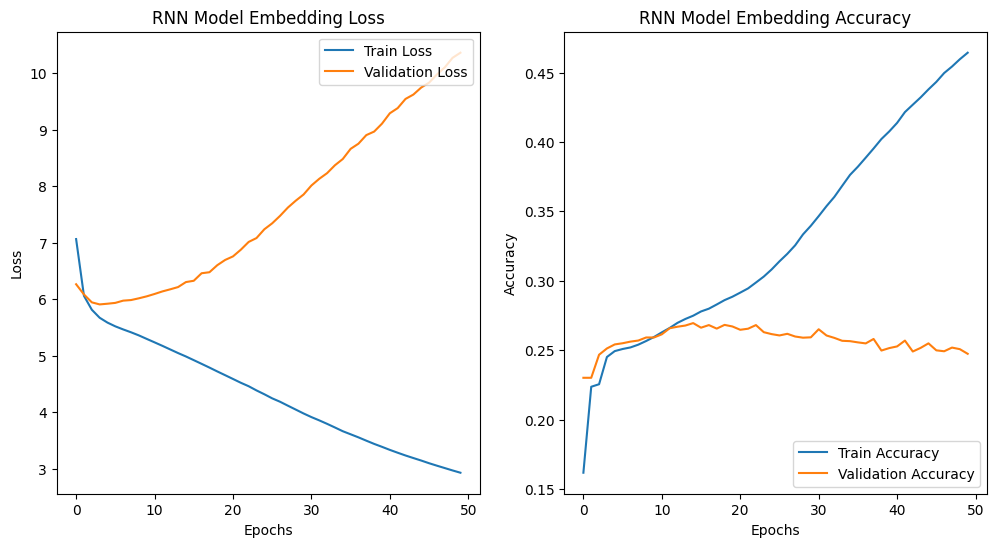

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(modified_rnn_history.history['loss'], label='Train Loss')
plt.plot(modified_rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Embedding Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(modified_rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(modified_rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Embedding Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**LSTM with Embeddings**

In [ ]:
# Define the modified LSTM model with embedding
def build_lstm_embedding_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=input_shape[0], output_dim=128, input_length=input_shape[1]),
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.Dense(64, activation='relu'), # add aditional layer
        tf.keras.layers.Dense(input_shape[0], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and compile the modified LSTM model with embedding
modified_lstm_model = build_lstm_embedding_model(input_shape)

# Train the modified LSTM model with embedding
modified_lstm_history = modified_lstm_model.fit(X_train, y_train_reshaped, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the modified LSTM model with embedding
modified_lstm_loss, modified_lstm_accuracy = modified_lstm_model.evaluate(X_test, y_test_reshaped)
print(f"Modified LSTM Model with Embedding - Loss: {modified_lstm_loss}, Accuracy: {modified_lstm_accuracy}")

Epoch 1/50
100/100 [==============================] - 8s 63ms/step - loss: 7.2821 - accuracy: 0.2200 - val_loss: 6.3447 - val_accuracy: 0.2301
Epoch 2/50
100/100 [==============================] - 5s 47ms/step - loss: 6.1363 - accuracy: 0.2242 - val_loss: 6.2622 - val_accuracy: 0.2302
Epoch 3/50
100/100 [==============================] - 3s 34ms/step - loss: 6.0096 - accuracy: 0.2242 - val_loss: 6.1745 - val_accuracy: 0.2305
Epoch 4/50
100/100 [==============================] - 3s 34ms/step - loss: 5.8387 - accuracy: 0.2251 - val_loss: 5.9944 - val_accuracy: 0.2407
Epoch 5/50
100/100 [==============================] - 3s 34ms/step - loss: 5.6836 - accuracy: 0.2433 - val_loss: 5.9546 - val_accuracy: 0.2513
Epoch 6/50
100/100 [==============================] - 4s 38ms/step - loss: 5.6170 - accuracy: 0.2460 - val_loss: 5.9620 - val_accuracy: 0.2512
Epoch 7/50
100/100 [==============================] - 3s 32ms/step - loss: 5.5673 - accuracy: 0.2469 - val_loss: 5.9775 - val_accuracy: 0.2532

In [ ]:
# Sample sentences for testing
sample_sentences = [
    "HI I AM",
    "I love machine learning.",
    "This is a test sentence.",
    "What is your name?",
    "What time is the meeting tomorrow?",
    "It cannot be copied arbitrarily since each Member State has",
    "how are you?",
    "How are you today?",
    "This is a test sentence.",
    "What is your name?"
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the trained LSTM model
predictions_lstm_embedding = modified_lstm_model.predict(sample_padded)

# Load the German tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Convert predictions back to text (German sentences)
predicted_sentences = []
for prediction in predictions_lstm_embedding:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences.append(decoded_sentence)

# Display the original and translated sentences
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences[i]}\n")

1/1 [==============================] - 1s 547ms/step
Input: HI I AM
Translated: ich bin sie

Input: I love machine learning.
Translated: ich

Input: This is a test sentence.
Translated: da ist eine die

Input: What is your name?
Translated: wa ist wir unsere verschiedenen

Input: What time is the meeting tomorrow?
Translated: wa werden e die schwer zahlreiche

Input: It cannot be copied arbitrarily since each Member State has
Translated: e ist tiefer brunswick die neue bezieht die mittelklasse

Input: how are you?
Translated: wie sind sie sie

Input: How are you today?
Translated: wie sind sie sie

Input: This is a test sentence.
Translated: da ist eine die

Input: What is your name?
Translated: wa ist wir unsere verschiedenen



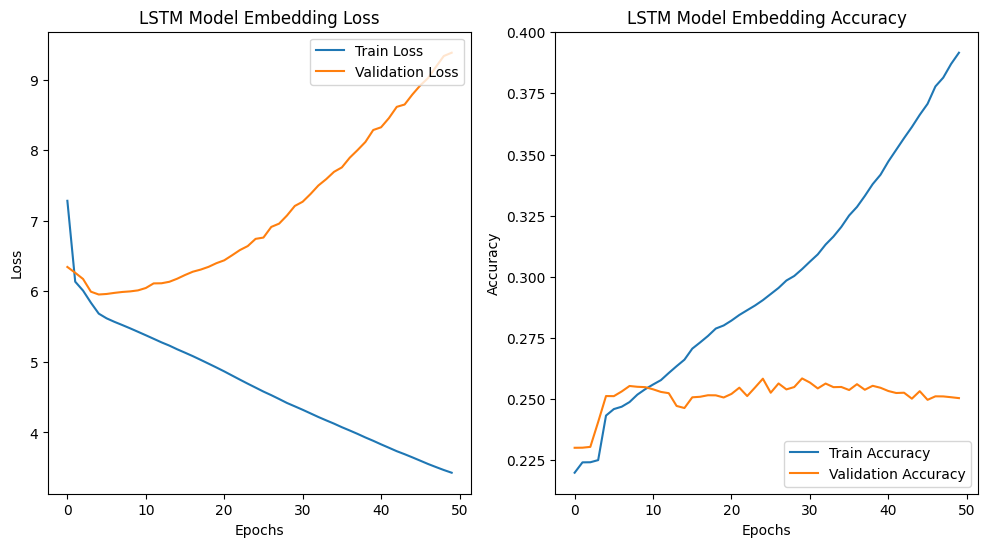

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(modified_lstm_history.history['loss'], label='Train Loss')
plt.plot(modified_lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Embedding Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(modified_lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(modified_lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Embedding Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Design, train and test bidirectional RNN & LSTM model**

**Bidirectional RNN**

In [ ]:
# Define the Bidirectional RNN model with embeddings
def build_bidirectional_rnn_model(input_shape, vocab_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=256, input_length=input_shape[1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(256, return_sequences=True)),
        tf.keras.layers.Dense(vocab_size, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define input and output shapes
vocab_size = max(eng_padded.max(), ger_padded.max()) + 1  # Adding 1 because max token value is equal to vocab size - 1
input_shape = (vocab_size, max_sequence_length)

# Assuming input_shape, vocab_size, and eng_padded, ger_padded are defined and loaded
bidirectional_rnn_model = build_bidirectional_rnn_model(input_shape, vocab_size)

# Reshape y_train and y_test for sparse_categorical_crossentropy
y_train_reshaped = np.expand_dims(y_train, -1)
y_test_reshaped = np.expand_dims(y_test, -1)

# Train the Bidirectional RNN model
bidirectional_rnn_history = bidirectional_rnn_model.fit(X_train, y_train_reshaped, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the Bidirectional RNN model
bidirectional_rnn_loss, bidirectional_rnn_accuracy = bidirectional_rnn_model.evaluate(X_test, y_test_reshaped)
print(f"Bidirectional RNN Model - Loss: {bidirectional_rnn_loss}, Accuracy: {bidirectional_rnn_accuracy}")

Epoch 1/50
100/100 [==============================] - 14s 113ms/step - loss: 6.5603 - accuracy: 0.2334 - val_loss: 6.0439 - val_accuracy: 0.2489
Epoch 2/50
100/100 [==============================] - 6s 59ms/step - loss: 5.7921 - accuracy: 0.2460 - val_loss: 5.9342 - val_accuracy: 0.2531
Epoch 3/50
100/100 [==============================] - 7s 69ms/step - loss: 5.6362 - accuracy: 0.2514 - val_loss: 5.9741 - val_accuracy: 0.2586
Epoch 4/50
100/100 [==============================] - 6s 59ms/step - loss: 5.4802 - accuracy: 0.2593 - val_loss: 5.9603 - val_accuracy: 0.2631
Epoch 5/50
100/100 [==============================] - 6s 62ms/step - loss: 5.2977 - accuracy: 0.2682 - val_loss: 5.9561 - val_accuracy: 0.2639
Epoch 6/50
100/100 [==============================] - 6s 62ms/step - loss: 5.0942 - accuracy: 0.2771 - val_loss: 6.0070 - val_accuracy: 0.2664
Epoch 7/50
100/100 [==============================] - 6s 63ms/step - loss: 4.8825 - accuracy: 0.2848 - val_loss: 6.0557 - val_accuracy: 0.27

In [ ]:
# Sample sentences for testing
sample_sentences = [
    "NEW YORK is a state.",
    "What happened?",
    "It cannot be copied arbitrarily",
    "how are you?",
    "I think not.",
    "I would also like to recognise the reasonable and flexible",
    "How are you today?",
    "This is a test sentence.",
    "What is your name?"
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the Bidirectional RNN model
predictions_rnn = bidirectional_rnn_model.predict(sample_padded)

# Load the German tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Convert predictions back to text (German sentences)
predicted_sentences_rnn = []
for prediction in predictions_rnn:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences_rnn.append(decoded_sentence)

# Display the original and translated sentences using Bidirectional RNN
print("Bidirectional RNN Model Predictions:")
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences_rnn[i]}\n")

1/1 [==============================] - 0s 227ms/step
Bidirectional RNN Model Predictions:
Input: NEW YORK is a state.
Translated: new york hat da auswirkungen politische an

Input: What happened?
Translated: wa passiert mit

Input: It cannot be copied arbitrarily
Translated: hat die hohe zwischen im

Input: how are you?
Translated: wie haben sie

Input: I think not.
Translated: ich meine nicht

Input: I would also like to recognise the reasonable and flexible
Translated: ich möchte ich die vernünftige und flexible haltung de rate loben

Input: How are you today?
Translated: wie gibt sie heute

Input: This is a test sentence.
Translated: da ist um für

Input: What is your name?
Translated: wie ist e bekannt



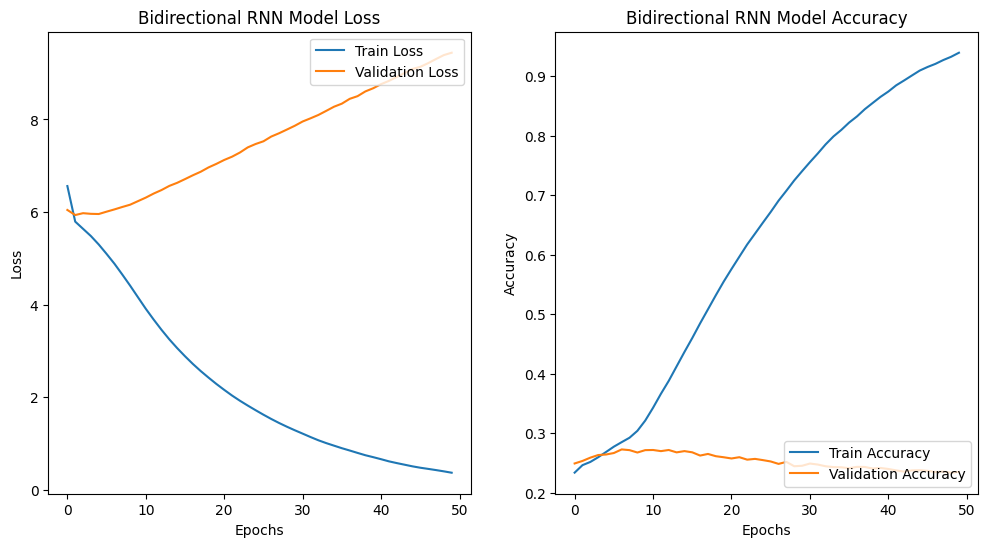

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(bidirectional_rnn_history.history['loss'], label='Train Loss')
plt.plot(bidirectional_rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional RNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(bidirectional_rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(bidirectional_rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional RNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Bidirectional LSTM**

In [ ]:
# Define the Bidirectional LSTM model with embeddings
def build_bidirectional_lstm_model(input_shape, vocab_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=256, input_length=input_shape[1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
        tf.keras.layers.Dense(vocab_size, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming input_shape, vocab_size, and eng_padded, ger_padded are defined and loaded
bidirectional_lstm_model = build_bidirectional_lstm_model(input_shape, vocab_size)

# Train the Bidirectional LSTM model
bidirectional_lstm_history = bidirectional_lstm_model.fit(X_train, y_train_reshaped, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the Bidirectional LSTM model
bidirectional_lstm_loss, bidirectional_lstm_accuracy = bidirectional_lstm_model.evaluate(X_test, y_test_reshaped)
print(f"Bidirectional LSTM Model - Loss: {bidirectional_lstm_loss}, Accuracy: {bidirectional_lstm_accuracy}")

Epoch 1/50
100/100 [==============================] - 12s 94ms/step - loss: 6.6477 - accuracy: 0.2307 - val_loss: 5.9164 - val_accuracy: 0.2460
Epoch 2/50
100/100 [==============================] - 5s 54ms/step - loss: 5.7578 - accuracy: 0.2448 - val_loss: 5.9019 - val_accuracy: 0.2507
Epoch 3/50
100/100 [==============================] - 5s 51ms/step - loss: 5.6496 - accuracy: 0.2484 - val_loss: 5.9078 - val_accuracy: 0.2512
Epoch 4/50
100/100 [==============================] - 5s 49ms/step - loss: 5.5620 - accuracy: 0.2510 - val_loss: 5.9390 - val_accuracy: 0.2472
Epoch 5/50
100/100 [==============================] - 5s 47ms/step - loss: 5.4706 - accuracy: 0.2560 - val_loss: 5.9608 - val_accuracy: 0.2486
Epoch 6/50
100/100 [==============================] - 5s 47ms/step - loss: 5.3660 - accuracy: 0.2596 - val_loss: 5.9796 - val_accuracy: 0.2517
Epoch 7/50
100/100 [==============================] - 5s 47ms/step - loss: 5.2317 - accuracy: 0.2679 - val_loss: 5.9810 - val_accuracy: 0.256

In [ ]:
# Sample sentences for testing
sample_sentences = [
    "NEW YORK is a state.",
    "What happened?",
    "Not anymore.",
    "how are you?",
    "I think not.",
    "I would also like to recognise the reasonable and flexible",
    "How are you today?",
    "This is a test sentence.",
    "Water is the essence of life."
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the Bidirectional LSTM model
predictions_lstm = bidirectional_lstm_model.predict(sample_padded)

# Load the German tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Convert predictions back to text (German sentences)
predicted_sentences_lstm = []
for prediction in predictions_lstm:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences_lstm.append(decoded_sentence)

# Display the original and translated sentences using Bidirectional LSTM
print("Bidirectional LSTM Model Predictions:")
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences_lstm[i]}\n")

1/1 [==============================] - 0s 45ms/step
Bidirectional LSTM Model Predictions:
Input: NEW YORK is a state.
Translated: new york neue eine eine

Input: What happened?
Translated: wa passiert

Input: Not anymore.
Translated: ist ist e nun vorbei

Input: how are you?
Translated: wie werden sie besseren

Input: I think not.
Translated: ich meine nicht

Input: I would also like to recognise the reasonable and flexible
Translated: auch möchte ich die vernünftige und flexible haltung de rate loben

Input: How are you today?
Translated: wie sind sie heute dinge

Input: This is a test sentence.
Translated: dy ist eine da

Input: What is your name?
Translated: wa ist ihr verloren vor



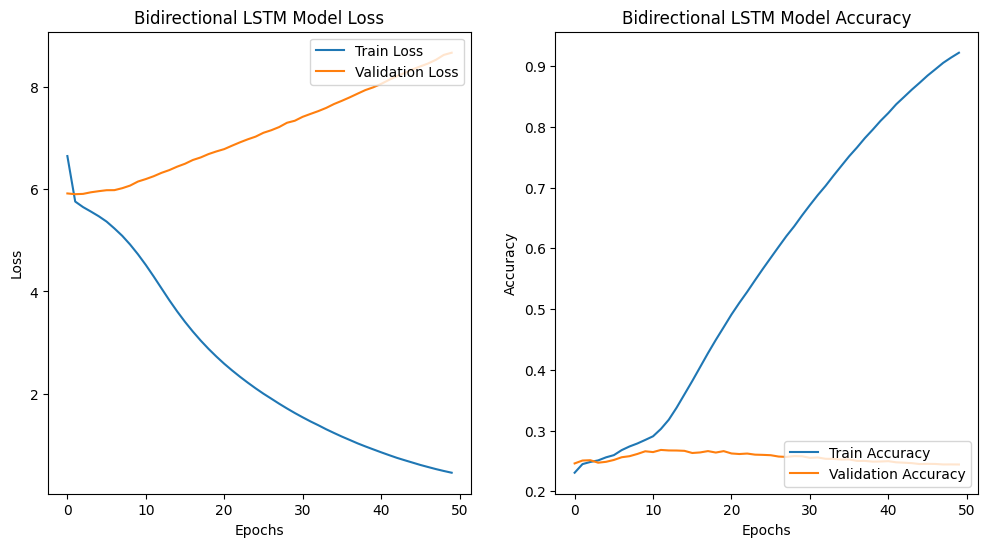

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(bidirectional_lstm_history.history['loss'], label='Train Loss')
plt.plot(bidirectional_lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(bidirectional_lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(bidirectional_lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

**Design, train and test Encoder-Decoder RNN & LSTM model**

**Encoder Decoder RNN**

In [ ]:
import tensorflow as tf

# Define Encoder-Decoder RNN model
def create_rnn_model(max_sequence_length, eng_vocab_size, ger_vocab_size):
    # Encoder
    encoder_inputs = tf.keras.layers.Input(shape=(max_sequence_length,))
    encoder_embedding = tf.keras.layers.Embedding(input_dim=eng_vocab_size, output_dim=256, input_length=max_sequence_length)(encoder_inputs)
    encoder_rnn = tf.keras.layers.SimpleRNN(256, return_sequences=False)(encoder_embedding)
    encoder_outputs = tf.keras.layers.RepeatVector(max_sequence_length)(encoder_rnn)

    # Decoder
    decoder_rnn = tf.keras.layers.SimpleRNN(256, return_sequences=True)(encoder_outputs)
    decoder_outputs = tf.keras.layers.Dense(ger_vocab_size, activation='softmax')(decoder_rnn)

    # Model
    model = tf.keras.models.Model(inputs=encoder_inputs, outputs=decoder_outputs)

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model_rnn_encode_decode = create_rnn_model(max_sequence_length, eng_vocab_size=len(eng_tokenizer.word_index)+1, ger_vocab_size=len(ger_tokenizer.word_index)+1)

# Display model summary
model_rnn_encode_decode.summary()

# Train the model
history_rnn = model_rnn_encode_decode.fit(X_train, y_train_reshaped, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss_rnn_encode_decode, accuracy_rnn_encode_decode = model_rnn_encode_decode.evaluate(X_test, y_test)
print(f"Test Loss: {loss_rnn_encode_decode:.4f}")
print(f"Test Accuracy: {accuracy_rnn_encode_decode*100:.2f}%")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 embedding_6 (Embedding)     (None, 17, 256)           1996544   
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 256)               131328    
                                                                 
 repeat_vector (RepeatVecto  (None, 17, 256)           0         
 r)                                                              
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 17, 256)           131328    
                                                                 
 dense_8 (Dense)             (None, 17, 16737)         4301409   
                                                             

In [ ]:
# Sample sentences for testing
sample_sentences = [
    "What happened?",
    "It cannot be copied arbitrarily",
    "how are you?",
    "I would like to end on the following point.",
    "I would also like to recognise the reasonable and flexible",
    "How are you today?",
    "This is a test sentence.",
    "What is your name?"
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the encoder decoder RNN model
predictions_encoder_decoder = model_rnn_encode_decode.predict(sample_padded)

# Load the German tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Convert predictions back to text (German sentences)
predicted_sentences_encoder_decoder = []
for prediction in predictions_encoder_decoder:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences_encoder_decoder.append(decoded_sentence)

# Display the original and translated sentences using Bidirectional RNN
print("Encoder Decoder RNN Predictions:")
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences_encoder_decoder[i]}\n")

1/1 [==============================] - 0s 233ms/step
Encoder Decoder RNN Predictions:
Input: What happened?
Translated: die ist die der die

Input: It cannot be copied arbitrarily
Translated: die ist die der die

Input: how are you?
Translated: die ist die der die

Input: I would like to end on the following point.
Translated: die ist die der die

Input: I would also like to recognise the reasonable and flexible
Translated: die ist die der die

Input: How are you today?
Translated: die ist die der die

Input: This is a test sentence.
Translated: die ist die der die

Input: What is your name?
Translated: die ist die der die



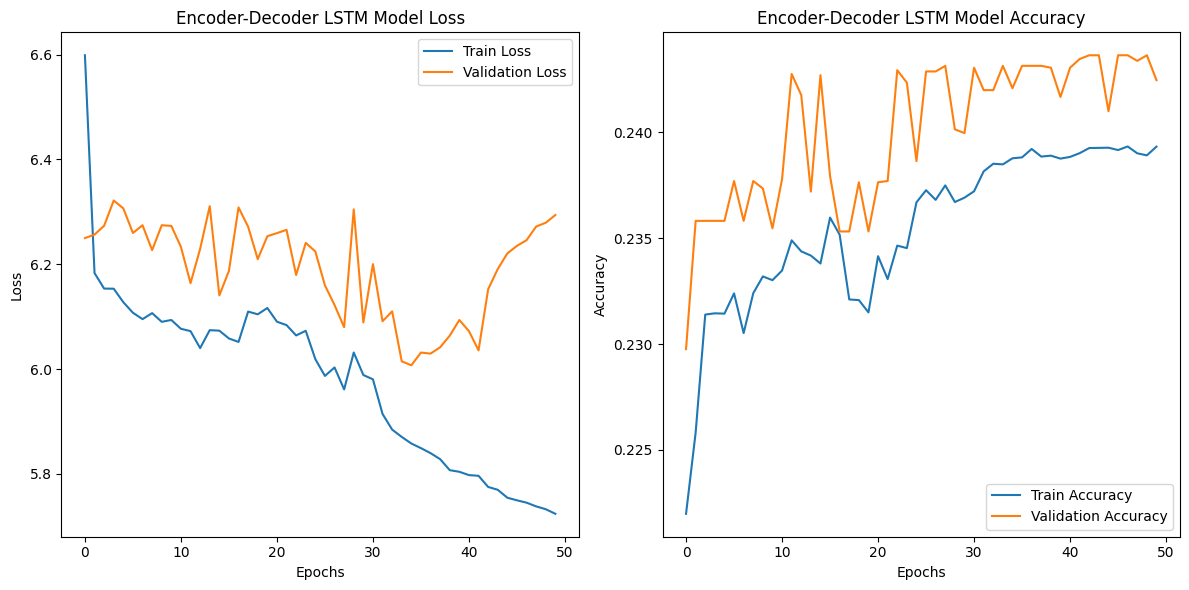

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Encoder-Decoder LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Encoder-Decoder LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout() # automatically adjust subplot into figure area
plt.show()

**Encoder Decoder LSTM**

In [ ]:
import tensorflow as tf

# Define Encoder-Decoder LSTM model
def create_model(max_sequence_length, eng_vocab_size, ger_vocab_size):
    # Encoder
    encoder_inputs = tf.keras.layers.Input(shape=(max_sequence_length,))
    encoder_embedding = tf.keras.layers.Embedding(input_dim=eng_vocab_size, output_dim=256, input_length=max_sequence_length)(encoder_inputs)
    encoder_lstm = tf.keras.layers.LSTM(256)(encoder_embedding)
    encoder_outputs = tf.keras.layers.RepeatVector(max_sequence_length)(encoder_lstm)

    # Decoder
    decoder_lstm = tf.keras.layers.LSTM(256, return_sequences=True)(encoder_outputs)
    decoder_outputs = tf.keras.layers.Dense(ger_vocab_size, activation='softmax')(decoder_lstm)

    # Model
    model = tf.keras.models.Model(inputs=encoder_inputs, outputs=decoder_outputs)

    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model(max_sequence_length, eng_vocab_size=len(eng_tokenizer.word_index)+1, ger_vocab_size=len(ger_tokenizer.word_index)+1)

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train_reshaped, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17)]              0         
                                                                 
 embedding_7 (Embedding)     (None, 17, 256)           1996544   
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 repeat_vector_1 (RepeatVec  (None, 17, 256)           0         
 tor)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 17, 256)           525312    
                                                                 
 dense_9 (Dense)             (None, 17, 16737)         4301409   
                                                           

In [ ]:
# Sample sentences for testing
sample_sentences = [
    "What happened?",
    "It cannot be copied arbitrarily",
    "how are you?",
    "I would like to end on the following point.",
    "I would also like to recognise the reasonable and flexible",
    "How are you today?",
    "This is a test sentence.",
    "What is your name?"
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the encoder decoder LSTM model
predictions_encoder_decoder_lstm = model.predict(sample_padded)

# Load the German tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Convert predictions back to text (German sentences)
predicted_sentences_encoder_decoder = []
for prediction in predictions_encoder_decoder_lstm:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences_encoder_decoder.append(decoded_sentence)

# Display the original and translated sentences using Bidirectional LSTM
print("Encoder Decoder LSTM Predictions:")
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences_encoder_decoder[i]}\n")

1/1 [==============================] - 1s 969ms/step
Encoder Decoder LSTM Predictions:
Input: What happened?
Translated: die ist die die die

Input: It cannot be copied arbitrarily
Translated: die ist die die die

Input: how are you?
Translated: die ist die die die

Input: I would like to end on the following point.
Translated: die ist die die die

Input: I would also like to recognise the reasonable and flexible
Translated: die ist die die die

Input: How are you today?
Translated: die ist die die die

Input: This is a test sentence.
Translated: die ist die die die

Input: What is your name?
Translated: die ist die die die



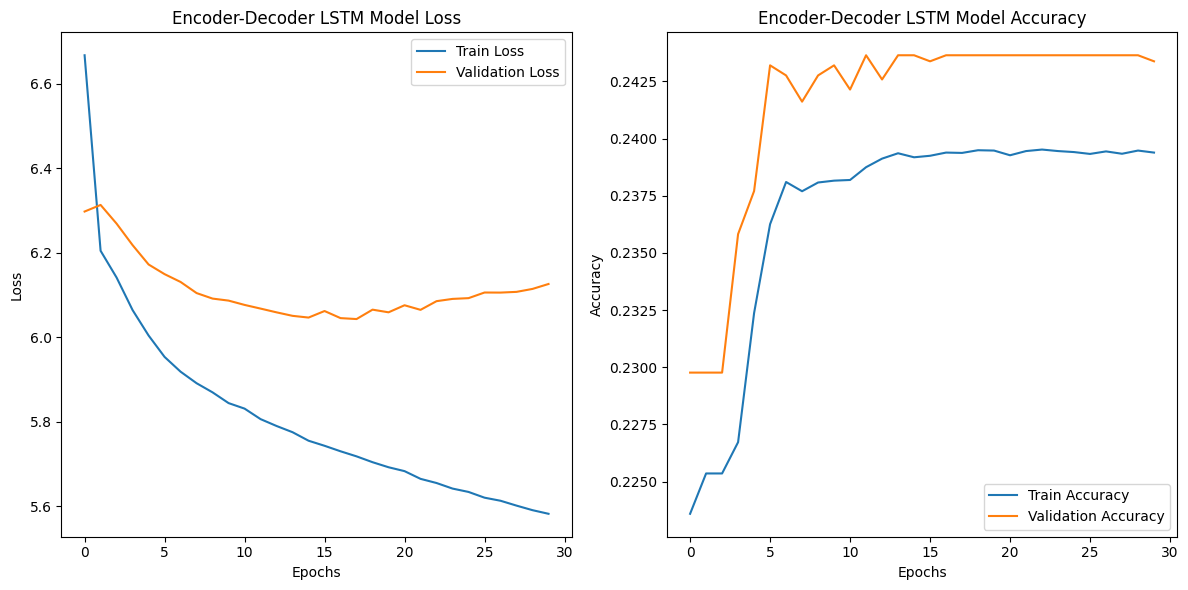

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Encoder-Decoder LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Encoder-Decoder LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()# automatically adjust subplot into figure area
plt.show()

**Choose the best performing model and pickle it.**

In [ ]:
from tabulate import tabulate

# Custom function to format accuracy as percentage
def format_accuracy(accuracy):
    return f"{accuracy:.2%}"

# Define the model accuracies
models = [
    {"Model": "Simple RNN","Loss": rnn_loss, "Accuracy": format_accuracy(rnn_accuracy)},
    {"Model": "Simple LSTM","Loss":lstm_loss, "Accuracy": format_accuracy(lstm_accuracy)},
    {"Model": "RNN Embedding","Loss": modified_rnn_loss, "Accuracy": format_accuracy(modified_rnn_accuracy)},
    {"Model": "LSTM Embedding","Loss":modified_lstm_loss, "Accuracy": format_accuracy(modified_lstm_accuracy)},
    {"Model": "Bidirectional RNN","Loss":bidirectional_rnn_loss, "Accuracy": format_accuracy(bidirectional_rnn_accuracy)},
    {"Model": "Bidirectional LSTM","Loss":bidirectional_lstm_loss, "Accuracy": format_accuracy(bidirectional_lstm_accuracy)},
    {"Model": "Encoder-Decoder RNN","Loss": loss_rnn_encode_decode, "Accuracy": format_accuracy(accuracy_rnn_encode_decode)},
    {"Model": "Encoder-Decoder LSTM","Loss": loss, "Accuracy": format_accuracy(accuracy)}
]

# Display the results in a tabular format
print(tabulate(models, headers="keys", floatfmt=".2f"))

Model                   Loss  Accuracy
--------------------  ------  ----------
Simple RNN              7.31  25.46%
Simple LSTM             7.05  26.27%
RNN Embedding          10.22  25.02%
LSTM Embedding          9.32  25.04%
Bidirectional RNN       9.40  23.04%
Bidirectional LSTM      8.62  24.49%
Encoder-Decoder RNN     6.29  24.25%
Encoder-Decoder LSTM    6.13  24.34%


Observation:
* Simple LSTM has a better accuaracy and loss compared to other models.
* But Bidirectional LSTM gives better translated output compared to other models.
* Therefore, we shall pickle Bidirectional LSTM.

In [ ]:
import pickle

# Pickle the Bidirectional LSTM model
model_filename = '/content/drive/MyDrive/bidirectional_lstm_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(bidirectional_lstm_model, f)

print(f"Bidirectional LSTM model saved as {model_filename}")

Bidirectional LSTM model saved as /content/drive/MyDrive/bidirectional_lstm_model.pkl


**Model Tuning Bidirectional LSTM**

In [39]:
import tensorflow as tf

# Define the Bidirectional LSTM model with embeddings
def build_bidirectional_lstm_model(input_shape, vocab_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=256, input_length=input_shape[1]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
        tf.keras.layers.Dense(vocab_size, activation='softmax')
    ])

    # Define optimizer with gradient clipping
    optimizer = tf.keras.optimizers.Adam(clipvalue=0.5)  # Adjust clipvalue as needed

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming input_shape, vocab_size, and eng_padded, ger_padded are defined and loaded
bidirectional_lstm_model = build_bidirectional_lstm_model(input_shape, vocab_size)

# Model tuning
batch_size = 64
epochs = 50

# Training the model
history = bidirectional_lstm_model.fit(X_train, y_train_reshaped, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluating the tuned model
loss, accuracy = bidirectional_lstm_model.evaluate(X_test, y_test_reshaped)
print(f"Bidirectional LSTM Model - Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/50
100/100 [==============================] - 15s 89ms/step - loss: 6.6252 - accuracy: 0.2304 - val_loss: 5.9041 - val_accuracy: 0.2457
Epoch 2/50
100/100 [==============================] - 7s 68ms/step - loss: 5.7426 - accuracy: 0.2455 - val_loss: 5.8938 - val_accuracy: 0.2512
Epoch 3/50
100/100 [==============================] - 5s 53ms/step - loss: 5.6429 - accuracy: 0.2488 - val_loss: 5.9189 - val_accuracy: 0.2507
Epoch 4/50
100/100 [==============================] - 5s 52ms/step - loss: 5.5574 - accuracy: 0.2518 - val_loss: 5.9428 - val_accuracy: 0.2528
Epoch 5/50
100/100 [==============================] - 5s 54ms/step - loss: 5.4664 - accuracy: 0.2556 - val_loss: 5.9832 - val_accuracy: 0.2507
Epoch 6/50
100/100 [==============================] - 5s 51ms/step - loss: 5.3584 - accuracy: 0.2601 - val_loss: 6.0135 - val_accuracy: 0.2536
Epoch 7/50
100/100 [==============================] - 5s 48ms/step - loss: 5.2322 - accuracy: 0.2674 - val_loss: 6.0048 - val_accuracy: 0.254

In [40]:
# Sample sentences for testing
sample_sentences = [
    "NEW YORK is a state.",
    "What happened?",
    "Not anymore.",
    "how are you?",
    "I think not.",
    "I would also like to recognise the reasonable and flexible",
    "How are you today?",
    "This is a test sentence.",
    "Water is the essence of life."
]

# Load the English tokenizer
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

# Tokenize and pad the sample sentences
sample_sequences = eng_tokenizer.texts_to_sequences(sample_sentences)
sample_padded = pad_sequences(sample_sequences, maxlen=max_sequence_length, padding='post')

# Perform inference using the Bidirectional LSTM model
predictions_lstm = bidirectional_lstm_model.predict(sample_padded)

# Load the German tokenizer
with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Convert predictions back to text (German sentences)
predicted_sentences_lstm = []
for prediction in predictions_lstm:
    # Decode prediction sequence to text
    decoded_sentence = ger_tokenizer.sequences_to_texts([np.argmax(prediction, axis=-1)])[0]
    predicted_sentences_lstm.append(decoded_sentence)

# Display the original and translated sentences using Bidirectional LSTM
print("Bidirectional LSTM Model Predictions:")
for i in range(len(sample_sentences)):
    print(f"Input: {sample_sentences[i]}")
    print(f"Translated: {predicted_sentences_lstm[i]}\n")

1/1 [==============================] - 1s 812ms/step
Bidirectional LSTM Model Predictions:
Input: NEW YORK is a state.
Translated: new york neue lautet lautet

Input: What happened?
Translated: wa passiert

Input: Not anymore.
Translated: damit ist e nun vorbei

Input: how are you?
Translated: wie sie sie

Input: I think not.
Translated: ich meine nicht

Input: I would also like to recognise the reasonable and flexible
Translated: ich möchte ich die vernünftige und flexible haltung de rate loben

Input: How are you today?
Translated: wie sie sie da

Input: This is a test sentence.
Translated: dy ist eine da

Input: Water is the essence of life.
Translated: wasser ist die grundlage de lebens



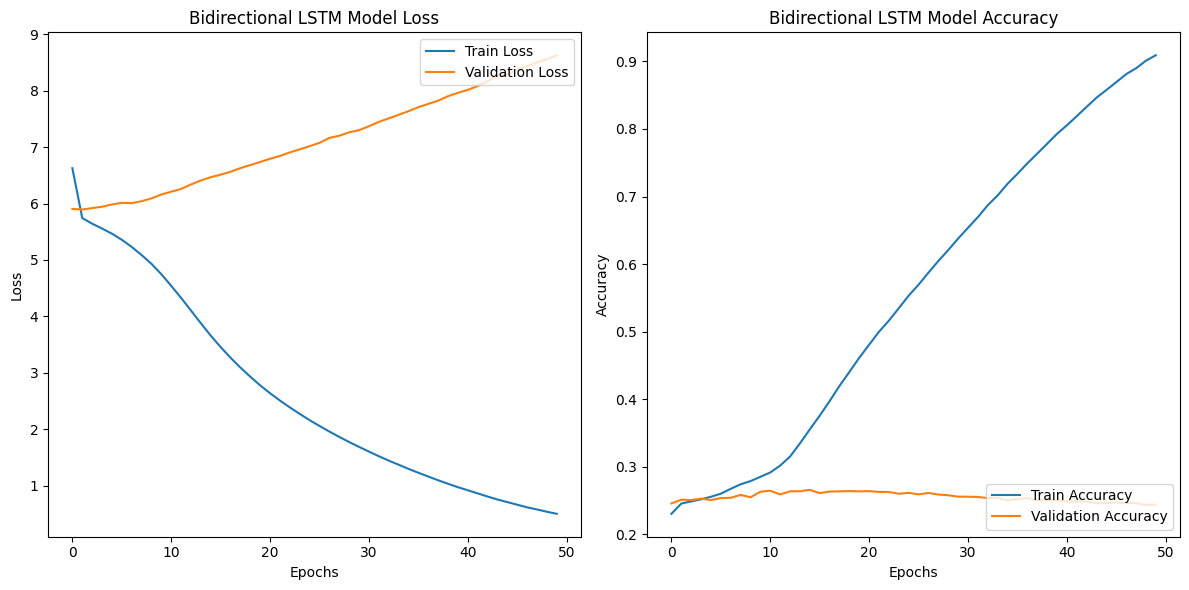

In [41]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()# automatically adjust subplot into figure area
plt.show()

## Milestone 3

**Design a clickable UI based Translation interface using Gradio API**

In [2]:
# Install gradio
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.8 M

In [10]:
import gradio as gr
import pickle
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Load the saved Bidirectional LSTM model
model_filename = '/content/drive/MyDrive/bidirectional_lstm_model.pkl'
with open(model_filename, 'rb') as f:
    bidirectional_lstm_model = pickle.load(f)

# Load the tokenizers
with open('/content/drive/MyDrive/eng_tokenizer_lemmatized.pkl', 'rb') as f:
    eng_tokenizer = pickle.load(f)

with open('/content/drive/MyDrive/ger_tokenizer_lemmatized.pkl', 'rb') as f:
    ger_tokenizer = pickle.load(f)

# Initialize lemmatizers
eng_lemmatizer = WordNetLemmatizer()
ger_lemmatizer = WordNetLemmatizer()

# Preprocessing functions
def preprocess_text_lemmatized_eng(text):
    tokens = nltk.word_tokenize(text.lower())
    lemmatized_tokens = [eng_lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return " ".join(lemmatized_tokens)

def preprocess_text_lemmatized_ger(text):
    tokens = nltk.word_tokenize(text.lower())
    lemmatized_tokens = [ger_lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    return " ".join(lemmatized_tokens)

# Translation function
def translate_sentence(input_sentence, direction='eng_to_ger'):
    if direction == 'eng_to_ger':
        preprocessed_sentence = preprocess_text_lemmatized_eng(input_sentence)
        sequence = eng_tokenizer.texts_to_sequences([preprocessed_sentence])
        padded_sequence = pad_sequences(sequence, maxlen=17, padding='post')
        translated_sequence = bidirectional_lstm_model.predict(padded_sequence)
        translated_sentence = ger_tokenizer.sequences_to_texts(np.argmax(translated_sequence, axis=-1))
    else:
        preprocessed_sentence = preprocess_text_lemmatized_ger(input_sentence)
        sequence = ger_tokenizer.texts_to_sequences([preprocessed_sentence])
        padded_sequence = pad_sequences(sequence, maxlen=17, padding='post')
        translated_sequence = bidirectional_lstm_model.predict(padded_sequence)
        translated_sentence = eng_tokenizer.sequences_to_texts(np.argmax(translated_sequence, axis=-1))

    return translated_sentence[0]

def translate(input_sentence, direction):
    return translate_sentence(input_sentence, direction)

# Create the Gradio interface
iface = gr.Interface(
    fn=translate,
    inputs=[gr.Textbox(lines=2, placeholder="Enter sentence..."), gr.Radio(["eng_to_ger", "ger_to_eng"], label="Translation Direction")],
    outputs="text",
    title="Machine Translation",
    description="Translate sentences between English and German."
)

# Launch the interface
iface.launch()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ef1bdb03833bfcaaa4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


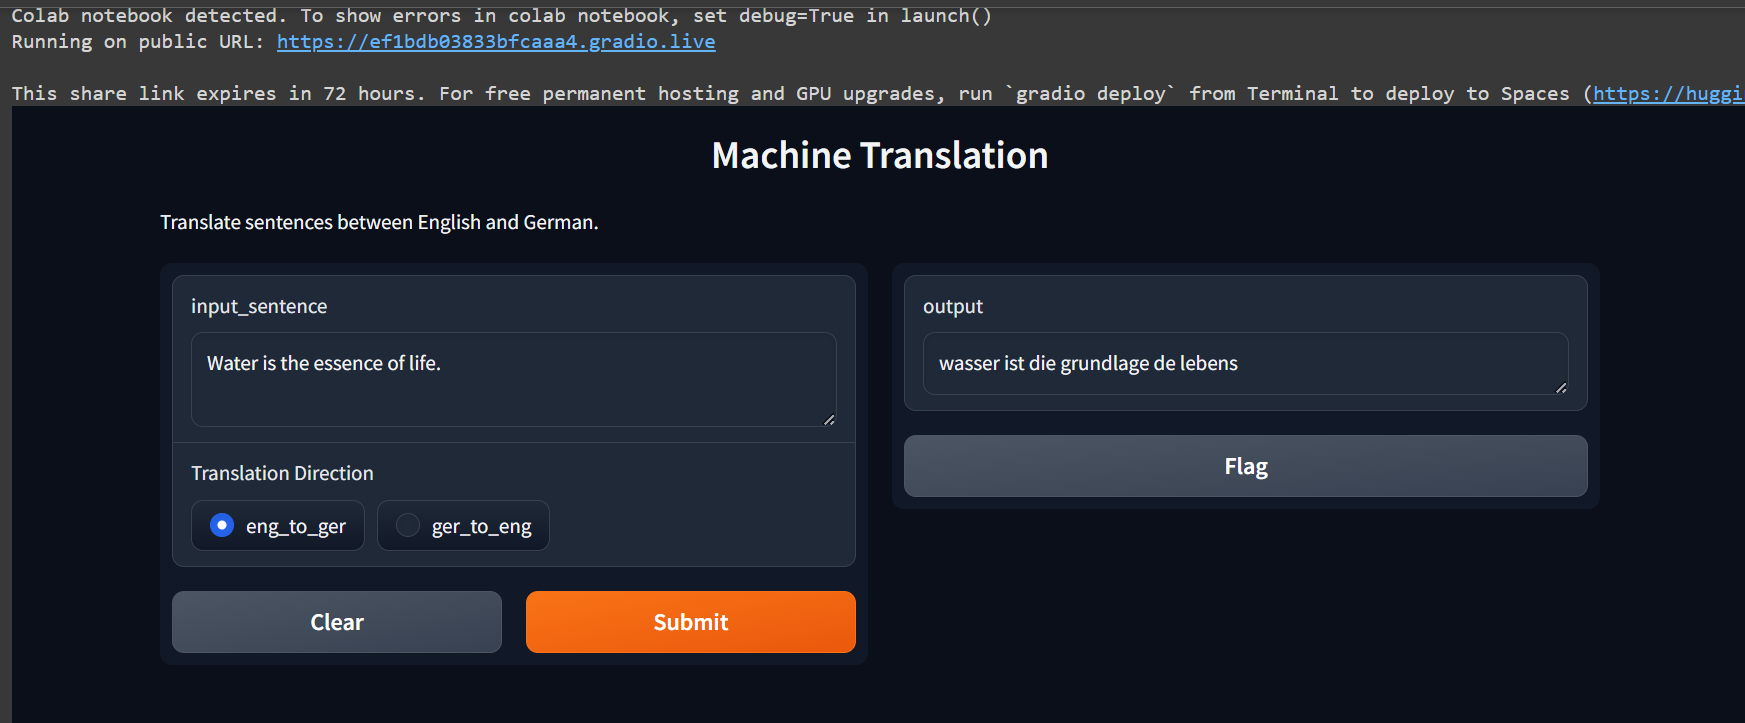

Observations:<br>
* Gradio API does not run in Jupyter notebook or HTML. The code was executed in Google Colab.
* The screenshot of the output is taken from Google Colab. 
* The English to German translation output is accurate.
* Input: “Water is the essence of life.”
* Output: “wasser ist die grundlage de lebens”
